# 가장 긴 팰린드롬
앞뒤를 뒤집어도 똑같은 문자열을 팰린드롬(palindrome)이라고 합니다.<br>
문자열 s가 주어질 때, s의 부분문자열(Substring)중 가장 긴 팰린드롬의 길이를 return 하는 solution 함수를 완성해 주세요.</p>

<p>예를들면, 문자열 s가 <q>abcdcba</q>이면 7을 return하고 <q>abacde</q>이면 3을 return합니다.</p>

<h5>제한사항</h5>

<ul>
<li>문자열 s의 길이 : 2,500 이하의 자연수</li>
<li>문자열 s는 알파벳 소문자로만 구성</li>
</ul>

<hr>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>s</th>
<th>answer</th>
</tr>
</thead>
        <tbody><tr>
<td><q>abcdcba</q></td>
<td>7</td>
</tr>
<tr>
<td><q>abacde</q></td>
<td>3</td>
</tr>
</tbody>
      </table>
<h5>입출력 예 설명</h5>

<p>입출력 예 #1<br>
4번째자리 'd'를 기준으로 문자열 s 전체가 팰린드롬이 되므로 7을 return합니다.</p>

<p>입출력 예 #2<br>
2번째자리 'b'를 기준으로 <q>aba</q>가 팰린드롬이 되므로 3을 return합니다.</p>
</div>
    </div>

  </div>

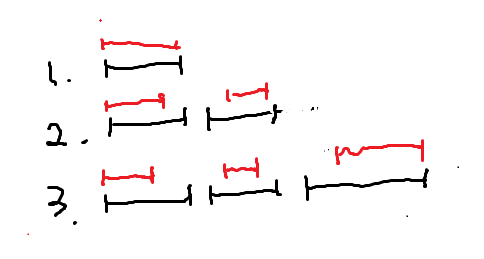
```
0 -> [:len]
1 -> [0:len-1], [1:len]
2 -> [0:len-2], [1:len-1], [2:len]

```

In [65]:
'''
IDEA: 가장 큰 window부터 시작해서 점점 좁혀나가자
1. 현재 크기로 만들 수 있는 모든 윈도우의 리스트 windows를 만든다
    1-1. 윈도우는 문자열 슬라이싱할 인덱스 쌍이다
    1-2. 맨 왼쪽이 0부터 시작하고, 맨 오른쪽은 윈도우 사이즈를 의미하는 문자열 길이-이동 거리이다
    1-3. 이동 거리만큼 왼쪽과 오른쪽 모두 1씩 증가하면서 윈도우를 하나씩 만들어나간다
2. 모든 윈도우를 순회하면서 substring을 만들고 검사한다
3. 매치되는 순간 해당 substring의 길이를 반환한다
'''
def solution(s):
    length = len(s) + 1
    idx = 1
    
    while idx < length-1:
        windows = ([left, right] for left, right in zip(range(idx), range(length-idx, length)))
        
        for left, right in windows:
            substr = s[left:right]
            if substr == substr[::-1]:
                return right-left

        idx += 1
        
    return 1

2

# 정수 삼각형
<div class="guide-section-description">
      <h6 class="guide-section-title">문제 설명</h6>
      <div class="markdown solarized-dark"><p><img src="https://grepp-programmers.s3.amazonaws.com/files/production/97ec02cc39/296a0863-a418-431d-9e8c-e57f7a9722ac.png" title="" alt="스크린샷 2018-09-14 오후 5.44.19.png"></p>

<p>위와 같은 삼각형의 꼭대기에서 바닥까지 이어지는 경로 중, 거쳐간 숫자의 합이 가장 큰 경우를 찾아보려고 합니다. 아래 칸으로 이동할 때는 대각선 방향으로 한 칸 오른쪽 또는 왼쪽으로만 이동 가능합니다. 예를 들어 3에서는 그 아래칸의 8 또는 1로만 이동이 가능합니다.</p>

<p>삼각형의 정보가 담긴 배열 triangle이 매개변수로 주어질 때, 거쳐간 숫자의 최댓값을 return 하도록 solution 함수를 완성하세요.</p>

<h5>제한사항</h5>

<ul>
<li>삼각형의 높이는 1 이상 500 이하입니다.</li>
<li>삼각형을 이루고 있는 숫자는 0 이상 9,999 이하의 정수입니다.</li>
</ul>

<h5>입출력 예</h5>
<table class="table">
        <thead><tr>
<th>triangle</th>
<th>result</th>
</tr>
</thead>
        <tbody><tr>
<td>[[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]</td>
<td>30</td>
</tr>
</tbody>
      </table>
<p><a href="http://stats.ioinformatics.org/countries/SWE" target="_blank" rel="noopener">출처</a></p>
</div>
    </div>

In [2]:
'''
1. out of range 에러를 피하기 위해 가장자리에 0을 붙인다
2. 매 층, 모든 노드를 순회하면서 해당 노드의 왼쪽 위와 오른쪽 위를 받아온다
3. 맨 왼쪽이면 오른쪽, 맨 오른쪽이면 왼쪽으로 이 외는 둘 중 큰 수로 정한다
4. 해당 값을 현재 triangle 노드에 저장한다 이는 현재 노드까지 만들 수 있는 가장 큰 수가 된다
5. 마지막 층에서 max값을 리턴한다
'''
def solution(triangle):
    max_height = len(triangle)
    triangle = [[0] + x + [0] for x in triangle]
    
    for floor in range(max_height):
        width = floor+2
        
        for idx in range(width):
            if not floor:  # 1층
                continue
                
            left = triangle[floor-1][idx-1]
            right = triangle[floor-1][idx]

            # 맨 왼쪽
            if idx == 1: 
                triangle[floor][idx] += right
            # 맨 오른쪽
            elif idx == width:
                triangle[floor][idx] += left
            # 둘 중 큰 쪽 선택
            else:
                triangle[floor][idx] += max(left, right)
                
    return max(triangle[-1])
                
triangle = [[7], [3, 8], [8, 1, 0], [2, 7, 4, 4], [4, 5, 2, 6, 5]]
# triangle = [[7]]
# triangle = [[7], [3, 8]]

solution(triangle)

30